# Module 2 Project Submission
* Student name: Helen Pham
* Student pace: Self-Paced 
* Scheduled project review date/time: Wednesday, January 27th, 2021 at 5PM ET
* Instructor name: Jeff Herman
* Blog post URL:

## 1. Introduction

I will be exploring the King County housing dataset using the OSEMN (Obtain - Scrub - Explore - Model - Interpret) approach in order to find the most important features that highly influence our target variable (price). 

## 2. Obtain Data

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.diagnostic import het_goldfeldquandt
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats

In [2]:
# import dataset
df = pd.read_csv("kc_house_data.csv", index_col = "id") 
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

**Column Names and Descriptions for Kings County Data Set**
* **id** - Unique identified for a house
* **date** - Date house was sold
* **price** - Price is prediction target
* **bedrooms** -  Number of bedrooms
* **bathrooms** -  Number of bathrooms
* **sqft_living** - Square footage of the home
* **sqft_lot** - Square footage of the lot
* **floors** - Total floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - Overall grade given to the housing unit, based on King County grading system
* **sqft_above** - Square footage of house apart from basement
* **sqft_basement** - Square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - Zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

## 3. Scrub & Explore

### Missing / Null Values

In [4]:
# Find missing values
df.isnull().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [5]:
# observe "waterfront" values
df.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [6]:
# Fill missing values for "waterfront" with 0
df.waterfront.fillna(0.0, inplace=True)

In [7]:
# observe "view" values
df.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [8]:
# Fill missing values for "view" with 0
df.view.fillna(0.0, inplace=True)

In [9]:
# observe "yr_renovated" values
df.yr_renovated.value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [10]:
# Fill missing values for "yr_renovated" with 0
df.yr_renovated.fillna(0.0, inplace=True)

In [11]:
# Check missing values
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Data Types

In [12]:
# cast waterfront column from float to int
df.waterfront = df.waterfront.astype('int64')

# replace ? values with 0
df['sqft_basement'] = df.sqft_basement.replace('?', 0.0) 
# cast sqft_basement from object to float
df.sqft_basement = df.sqft_basement.astype('float64') 

# from float to int
df.view = df.view.astype('int64') 

# from float to int
df.floors = df.floors.astype('int64') 

# from float to int
df.yr_renovated = df.yr_renovated.astype('int64')

In [13]:
# convert date
df['date'] = pd.to_datetime(df['date'])

# creating a separate column that just extracts the month and year from the original date column
df['month_sold'] = df['date'].dt.month  
df['year_sold'] = df['date'].dt.year

In [14]:
# create renovated column to show whether homes were renovated or built in the last 10 years
df['renovated'] = df['year_sold'] - df['yr_renovated']

# Replace any values less than 10 with 1, and any values over 10 with 0
renovated = df.renovated.values

# Convert year_built to age
df['age'] = 2015 - df.yr_built
df = df.drop(columns=['yr_built'], axis=1)
age = df.age.values
values = np.where(renovated <= 10, 1, 0)
df['renovated'] = np.where(age <= 10, 1, values)
df.renovated = df.renovated.astype('int64')

# Drop yr_renovated column
df.drop(columns=['yr_renovated'], axis=1, inplace=True)

# Drop age column
df.drop(columns=['age'], axis=1, inplace=True)

# Drop date column
df.drop(columns=['date'], axis=1, inplace=True)

In [15]:
# check our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  int64  
 6   waterfront     21597 non-null  int64  
 7   view           21597 non-null  int64  
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  float64
 12  zipcode        21597 non-null  int64  
 13  lat            21597 non-null  float64
 14  long           21597 non-null  float64
 15  sqft_living15  21597 non-null  int64  
 16  sqft_lot15     21597 non-null  int64  
 17  month_sold     21597 non-null  int64

### Multicollinearity

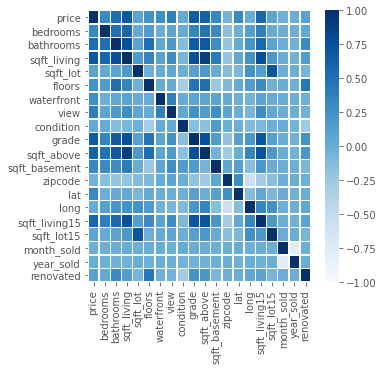

In [16]:
# making the correlation matrix
corr = df.corr() 

# Generate a mask 
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
plt.subplots(figsize=(5,5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap="Blues", vmax=1, vmin=-1, center=0, linewidths=.5)

In [17]:
# Show all pairwise correlations above .75
abs(corr) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold,renovated
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False


In [18]:
# High correlations between sqft_living vs. bathrooms
# High correlations between sqft_living vs. grade
# High correlations between sqft_living vs. sqft_above
# High correlations between sqft_living vs. sqft_living15
# High correlations between grade vs.sqft_above
# High correlations between sqft_living15 vs. grade
# High correlations between sqft_living15 vs. sqft_above
# High correlations between year_sold vs. month_sold

df.drop(['sqft_above'], axis=1, inplace=True)
df.drop(['sqft_basement'], axis=1, inplace=True)
df.drop(['grade'], axis=1, inplace=True)
df.drop(['sqft_living15'], axis=1, inplace=True)
df.drop(['sqft_lot15'], axis=1, inplace=True)
df.drop(['year_sold'], axis=1, inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  int64  
 6   waterfront   21597 non-null  int64  
 7   view         21597 non-null  int64  
 8   condition    21597 non-null  int64  
 9   zipcode      21597 non-null  int64  
 10  lat          21597 non-null  float64
 11  long         21597 non-null  float64
 12  month_sold   21597 non-null  int64  
 13  renovated    21597 non-null  int64  
dtypes: float64(4), int64(10)
memory usage: 2.5 MB


### Outliers

In [20]:
# Look at statistics info
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,zipcode,lat,long,month_sold,renovated
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.445988,0.006760,0.233181,3.409825,98077.951845,47.560093,-122.213982,6.573969,0.159328
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.551658,0.081944,0.764673,0.650546,53.513072,0.138552,0.140724,3.115061,0.365990
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,98001.000000,47.155900,-122.519000,1.000000,0.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,98033.000000,47.471100,-122.328000,4.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.000000,0.000000,0.000000,3.000000,98065.000000,47.571800,-122.231000,6.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,98118.000000,47.678000,-122.125000,9.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.000000,1.000000,4.000000,5.000000,98199.000000,47.777600,-121.315000,12.000000,1.000000


In [21]:
# Value counts for bedroom
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [22]:
# Keep values from 1 - 7 bedrooms
df = df[(df.bedrooms <= 7)] 

In [23]:
# Look at statistics info again
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,zipcode,lat,long,month_sold,renovated
count,2.157300e+04,21573.000000,21573.000000,21573.000000,2.157300e+04,21573.000000,21573.000000,21573.000000,21573.000000,21573.000000,21573.000000,21573.000000,21573.000000,21573.000000
mean,5.398153e+05,3.366198,2.114113,2078.566773,1.510754e+04,1.445696,0.006768,0.233208,3.409771,98077.943448,47.560013,-122.213912,6.572892,0.159412
std,3.665808e+05,0.887545,0.766504,916.313151,4.143470e+04,0.551603,0.081989,0.764735,0.650479,53.523320,0.138592,0.140767,3.114633,0.366069
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,98001.000000,47.155900,-122.519000,1.000000,0.000000
25%,3.219500e+05,3.000000,1.750000,1420.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,98033.000000,47.470700,-122.328000,4.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.000000,0.000000,0.000000,3.000000,98065.000000,47.571700,-122.230000,6.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,98118.000000,47.678000,-122.125000,9.000000,0.000000
max,7.700000e+06,7.000000,8.000000,13540.000000,1.651359e+06,3.000000,1.000000,4.000000,5.000000,98199.000000,47.777600,-121.315000,12.000000,1.000000


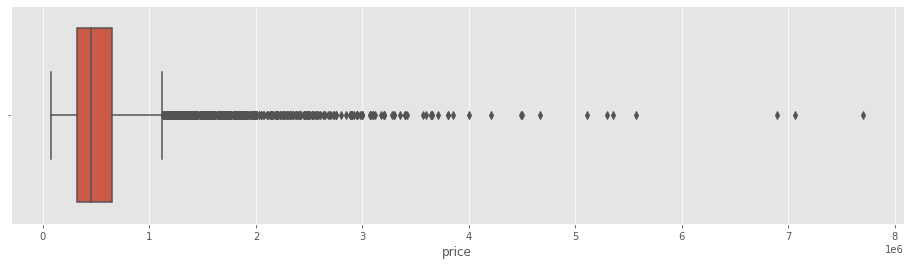

In [24]:
# Boxplot for price
plt.figure(figsize=(16,4))
plt.subplot(111)
sns.boxplot(x='price', data=df)

Text(0.5, 1.0, 'Price Distribution')

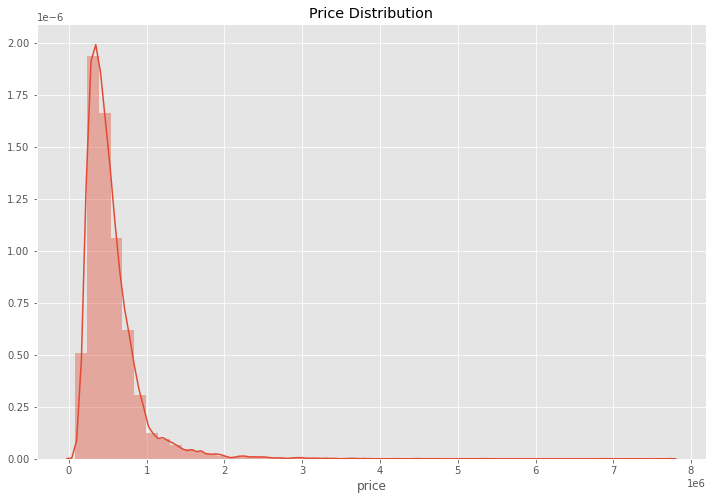

In [25]:
plt.figure(figsize=(12, 8))
sns.distplot(df.price)
plt.title('Price Distribution')

In [26]:
df = df[df['price'] <= 1000000]

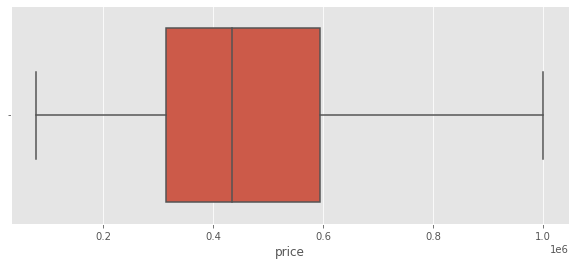

In [27]:
# check boxplot for price
plt.figure(figsize=(10,4))
plt.subplot(111)
sns.boxplot(x='price', data=df)

Text(0.5, 1.0, 'Price Distribution')

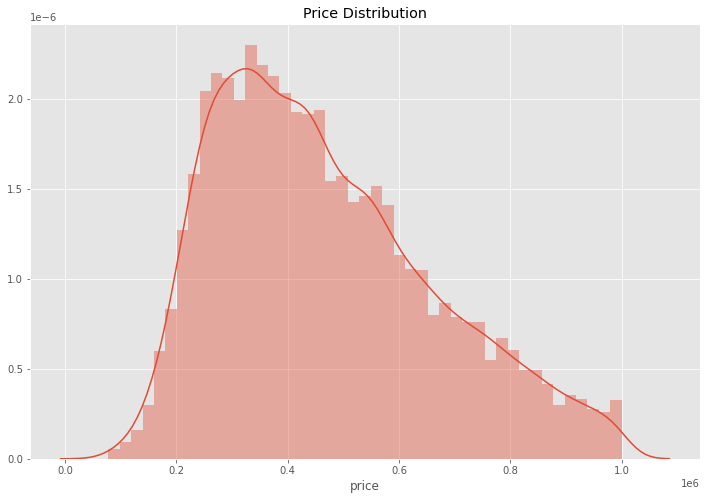

In [28]:
plt.figure(figsize=(12, 8))
sns.distplot(df.price)
plt.title('Price Distribution')

In [29]:
# Look at statistics info again to see any unusual numbers
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,zipcode,lat,long,month_sold,renovated
count,20122.000000,20122.000000,20122.000000,20122.000000,2.012200e+04,20122.000000,20122.000000,20122.000000,20122.000000,20122.000000,20122.000000,20122.000000,20122.000000,20122.000000
mean,467846.888928,3.316867,2.038155,1954.530713,1.450800e+04,1.423616,0.002485,0.161962,3.405377,98078.576086,47.555890,-122.213251,6.577925,0.152619
std,196472.910663,0.869716,0.700580,754.634015,3.997407e+04,0.548212,0.049787,0.619385,0.645828,53.322773,0.141696,0.142462,3.117948,0.359629
min,78000.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,98001.000000,47.155900,-122.519000,1.000000,0.000000
25%,314275.000000,3.000000,1.500000,1390.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,98033.000000,47.457500,-122.330000,4.000000,0.000000
50%,434500.000000,3.000000,2.000000,1840.000000,7.500000e+03,1.000000,0.000000,0.000000,3.000000,98065.000000,47.565800,-122.233000,6.000000,0.000000
75%,593757.750000,4.000000,2.500000,2410.000000,1.026000e+04,2.000000,0.000000,0.000000,4.000000,98118.000000,47.680100,-122.122000,9.000000,0.000000
max,1000000.000000,7.000000,6.750000,7480.000000,1.651359e+06,3.000000,1.000000,4.000000,5.000000,98199.000000,47.777600,-121.315000,12.000000,1.000000


After cleaning our dataset, I think we are now ready to explore the independent variables to our dependent variable (price).

### Observe correlations between Price and Features

Text(0, 0.5, 'Price')

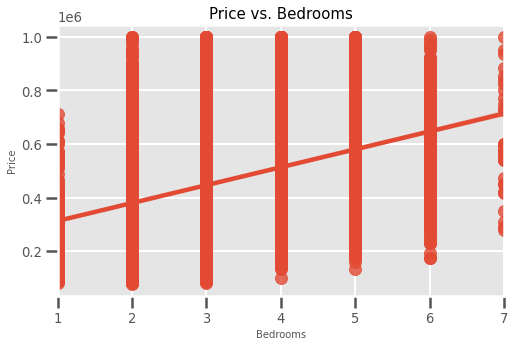

In [30]:
sns.set_context('poster', font_scale = 0.6)
plt.figure(figsize = (8,5))
sns.regplot(x = "bedrooms", y = "price", data = df)
plt.title('Price vs. Bedrooms', fontsize = 15)
plt.xlabel('Bedrooms', fontsize = 10)
plt.ylabel('Price', fontsize = 10)

Text(0, 0.5, 'Price')

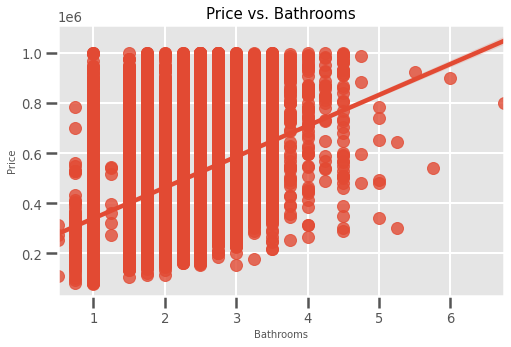

In [31]:
sns.set_context('poster', font_scale = 0.6)
plt.figure(figsize = (8,5))
sns.regplot(x = "bathrooms", y = "price", data = df)
plt.title('Price vs. Bathrooms', fontsize = 15)
plt.xlabel('Bathrooms', fontsize = 10)
plt.ylabel('Price', fontsize = 10)

Text(0, 0.5, 'Price')

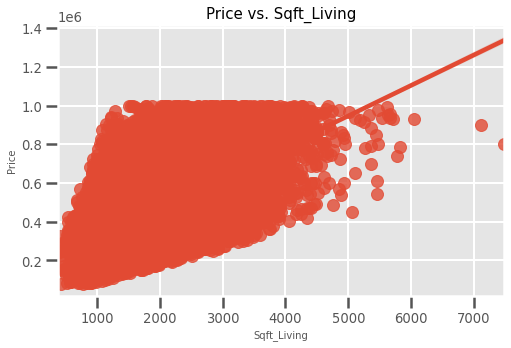

In [32]:
plt.figure(figsize = (8,5))
sns.regplot(x = "sqft_living", y = "price", data = df)
plt.title('Price vs. Sqft_Living', fontsize = 15)
plt.xlabel('Sqft_Living', fontsize = 10)
plt.ylabel('Price', fontsize = 10)

Text(0, 0.5, 'Price')

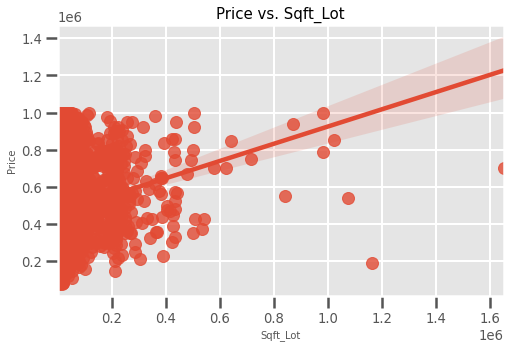

In [33]:
plt.figure(figsize = (8,5))
sns.regplot(x = "sqft_lot", y = "price", data = df)
plt.title('Price vs. Sqft_Lot', fontsize = 15)
plt.xlabel('Sqft_Lot', fontsize = 10)
plt.ylabel('Price', fontsize = 10)

Text(0, 0.5, 'Price')

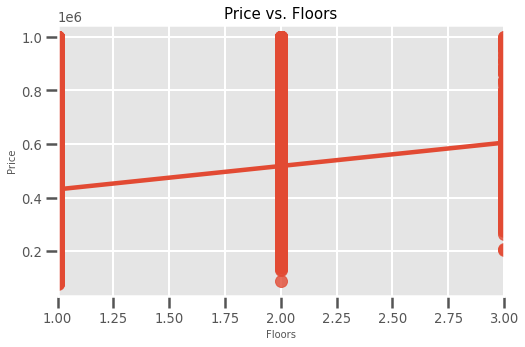

In [34]:
plt.figure(figsize = (8,5))
sns.regplot(x = "floors", y = "price", data = df, ci=False)
plt.title('Price vs. Floors', fontsize = 15)
plt.xlabel('Floors', fontsize = 10)
plt.ylabel('Price', fontsize = 10)

Text(0, 0.5, 'Price')

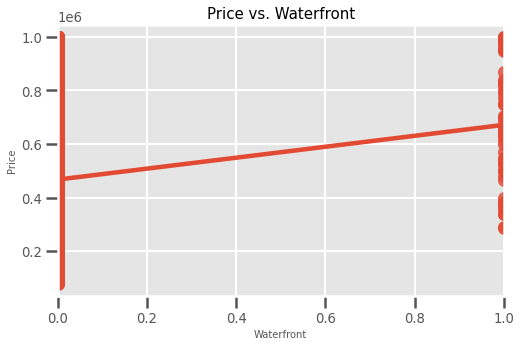

In [35]:
plt.figure(figsize = (8,5))
sns.regplot(x = "waterfront", y = "price", data = df, ci=False)
plt.title('Price vs. Waterfront', fontsize = 15)
plt.xlabel('Waterfront', fontsize = 10)
plt.ylabel('Price', fontsize = 10)

Text(0, 0.5, 'Price')

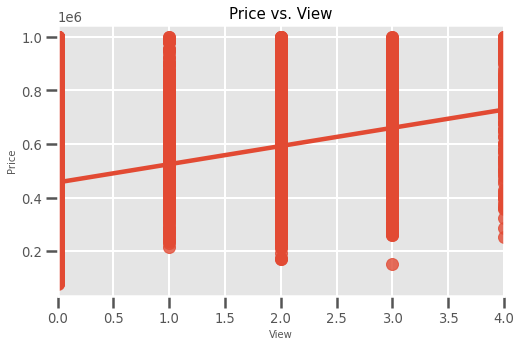

In [36]:
plt.figure(figsize = (8,5))
sns.regplot(x = "view", y = "price", data = df, ci=False)
plt.title('Price vs. View', fontsize = 15)
plt.xlabel('View', fontsize = 10)
plt.ylabel('Price', fontsize = 10)

Text(0, 0.5, 'Price')

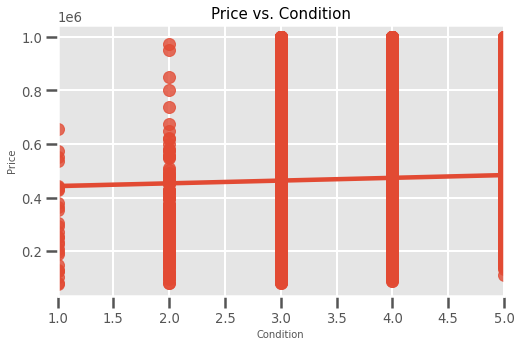

In [37]:
plt.figure(figsize = (8,5))
sns.regplot(x = "condition", y = "price", data = df)
plt.title('Price vs. Condition', fontsize = 15)
plt.xlabel('Condition', fontsize = 10)
plt.ylabel('Price', fontsize = 10)

Text(0, 0.5, 'Price')

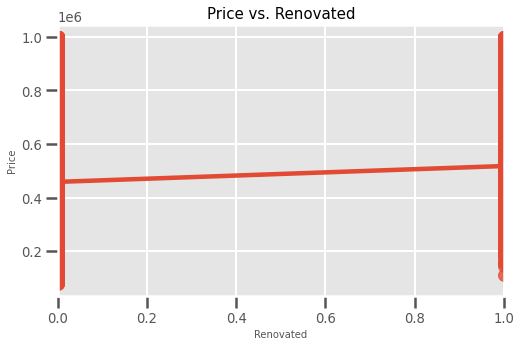

In [38]:
plt.figure(figsize = (8,5))
sns.regplot(x = "renovated", y = "price", data = df, ci=False)
plt.title('Price vs. Renovated', fontsize = 15)
plt.xlabel('Renovated', fontsize = 10)
plt.ylabel('Price', fontsize = 10)

Text(0, 0.5, 'Price')

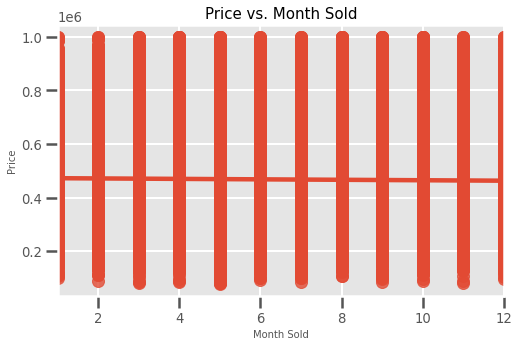

In [39]:
sns.set_context('poster', font_scale = 0.6)
plt.figure(figsize = (8,5))
sns.regplot(x = "month_sold", y = "price", data = df, ci=False)
plt.title('Price vs. Month Sold', fontsize = 15)
plt.xlabel('Month Sold', fontsize = 10)
plt.ylabel('Price', fontsize = 10)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69]),
 <a list of 70 Text major ticklabel objects>)

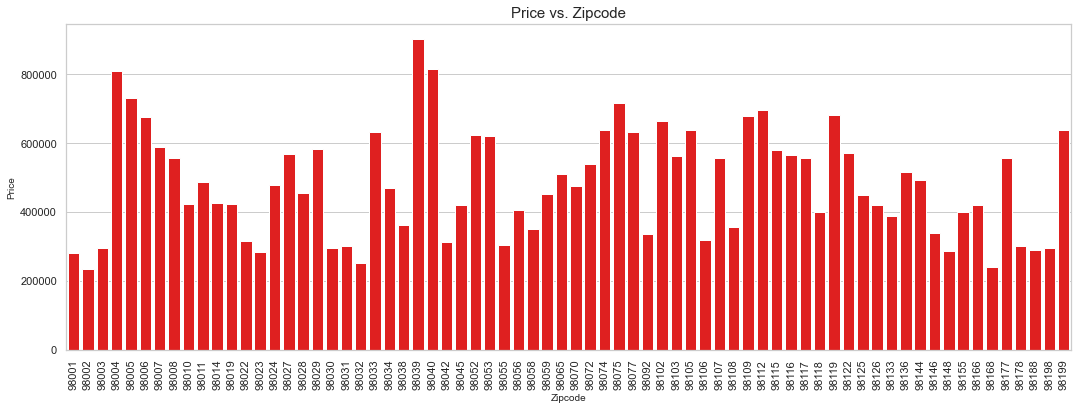

In [40]:
sns.set(style='whitegrid')
plt.subplots(figsize=(18, 6))
sns.barplot(x='zipcode', y='price', ci=False, data=df, color='red')
plt.title('Price vs. Zipcode', fontsize = 15)
plt.xlabel('Zipcode', fontsize = 10)
plt.ylabel('Price', fontsize = 10)
plt.xticks(rotation = 90)

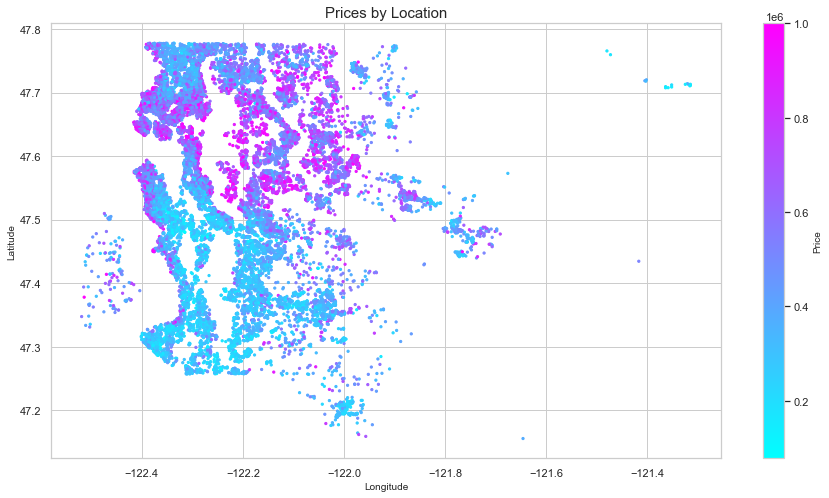

In [41]:
plt.figure(figsize = (15,8))
plt.scatter(df.long, df.lat ,c=df.price, cmap = 'cool', s=5)
plt.colorbar().set_label('Price', fontsize = 10)
plt.xlabel('Longitude', fontsize = 10)
plt.ylabel('Latitude', fontsize = 10)
plt.title('Prices by Location', fontsize = 15)
plt.show()

#### Categorical vs. Numerical Data

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20122 entries, 7129300520 to 1523300157
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        20122 non-null  float64
 1   bedrooms     20122 non-null  int64  
 2   bathrooms    20122 non-null  float64
 3   sqft_living  20122 non-null  int64  
 4   sqft_lot     20122 non-null  int64  
 5   floors       20122 non-null  int64  
 6   waterfront   20122 non-null  int64  
 7   view         20122 non-null  int64  
 8   condition    20122 non-null  int64  
 9   zipcode      20122 non-null  int64  
 10  lat          20122 non-null  float64
 11  long         20122 non-null  float64
 12  month_sold   20122 non-null  int64  
 13  renovated    20122 non-null  int64  
dtypes: float64(4), int64(10)
memory usage: 2.9 MB


Right now, we have the following independent variables
* bedrooms - this could be categorical (because you can't say 3.14 bedrooms) but from the regression plot above, we can see that prices increase as the number of bedrooms increases. So I'm keeping bedrooms as numerical
* bathrooms - similar to bedrooms (you can say you have 1, 1.25, 1.5, 1.75 bedrooms but not 1.8679 bedrooms), we can see from the regression plot that prices increases as the number of bathrooms increases. So I'm keeping bathrooms as numerical
* sqft_living	- numerical data
* sqft_lot - numerical data
* floors - similar to bedrooms and bathrooms. I'm keeping floors as numerical
* waterfront - this is categorical data (whether you have waterfront or not)
* view - this is categorical data (whether your property has been viewed or not)
* condition - this is categorical data (your house can be categorized into one of the 5 conditions)
* zipcode	- categorical data (your property either in a specific zipcode or not)
* lat	- numerical data
* long - numerical data
* month_sold - categorical data (you sell your house in 1 of 12 months)
* renovated - categorical data (whether your house has been renovated or not)

In [43]:
# waterfront
bins_waterfront = pd.cut(df['waterfront'], bins = 2, labels = ["no_waterfront", "has_waterfront"])
bins_waterfront= bins_waterfront.cat.as_unordered()
df['waterfront'] = bins_waterfront
df['waterfront'] = df['waterfront'].astype('category')
waterfront = pd.get_dummies(df['waterfront'], prefix='waterfront', drop_first=True)

In [44]:
# view
bins_view = pd.cut(df['view'], bins = 2, labels = ["not_viewed", "viewed"])
bins_view = bins_view.cat.as_unordered()
df['view'] = bins_view
df['view'] = df['view'].astype('category')
view = pd.get_dummies(df['view'], prefix='view', drop_first=True)

In [45]:
# condition
df['condition'] = df['condition'].astype('category')
condition = pd.get_dummies(df['condition'], prefix='condition', drop_first=True)

In [46]:
# drop zipcode because we already have long & lat coordinates which indicate exact location of the properties
df.drop(['zipcode'], axis=1, inplace=True)

In [47]:
# month_sold
bins_month = pd.cut(df['month_sold'], bins = 12, labels = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 
                                                           'JUL', 'AUG', 'SEP', 'OCT', 'NOV','DEC'])
bins_month = bins_month.cat.as_unordered()
df['month_sold'] = bins_month
df['month_sold'] = df['month_sold'].astype('category')
month_sold = pd.get_dummies(df['month_sold'], prefix='month_sold', drop_first=True)

In [48]:
# renovated
bins_renovated = pd.cut(df['renovated'], bins = 2, labels = ["not_renovated", "renovated"])
bins_renovated = bins_renovated.cat.as_unordered()
df['renovated'] = bins_renovated
df['renovated'] = df['renovated'].astype('category')
renovated = pd.get_dummies(df['renovated'], prefix='renovated', drop_first=True)

In [49]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'lat', 'long', 'month_sold',
       'renovated'],
      dtype='object')

In [50]:
# adding these new categories to our dataframe
df = pd.concat([df, waterfront, view, condition, month_sold, renovated], axis=1)

In [51]:
# dropping the old columns that contained this information
df.drop(['waterfront', 'view', 'month_sold', 'condition','renovated'], axis=1, inplace=True)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20122 entries, 7129300520 to 1523300157
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   price                      20122 non-null  float64
 1   bedrooms                   20122 non-null  int64  
 2   bathrooms                  20122 non-null  float64
 3   sqft_living                20122 non-null  int64  
 4   sqft_lot                   20122 non-null  int64  
 5   floors                     20122 non-null  int64  
 6   lat                        20122 non-null  float64
 7   long                       20122 non-null  float64
 8   waterfront_has_waterfront  20122 non-null  uint8  
 9   view_viewed                20122 non-null  uint8  
 10  condition_2                20122 non-null  uint8  
 11  condition_3                20122 non-null  uint8  
 12  condition_4                20122 non-null  uint8  
 13  condition_5                20122

## 4. Model

In [53]:
# Function for linear regression
def linear_model(dataframe):
    '''Build linear regression model, return model and print model summary from statsmodels.'''
    #Create feature and target columns
    X = dataframe.drop(columns=['price'], axis=1)
    y = dataframe.price
    
    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20)
    
    # Fit the model
    linreg = LinearRegression()
    model = linreg.fit(X_train, y_train)
    model
    
    # View model accuracy
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    print('Training Score:', round(train_score, 3))
    print('Test Score:', round(test_score, 3))
    print('Coefficients:', model.coef_)
    
    # View model summary in statsmodels
    X_train = sm.add_constant(X_train)
    smmodel = sm.OLS(y_train, X_train).fit()
    print(smmodel.summary())
    return smmodel

### Model 1

In [56]:
model = linear_model(df)
model

Training Score: 0.593
Test Score: 0.592
Coefficients: [-1.70798593e+04  9.91704573e+03  1.58069830e+02  2.56660165e-01
  1.89361203e+04  6.18518427e+05 -5.95159735e+04  1.54274118e+05
  1.01627063e+05  1.14651251e+04  4.33547330e+04  7.88094916e+04
  1.13018230e+05  5.87770002e+03  2.28026223e+04  3.43979912e+04
  1.13800278e+04  9.59533317e+03  7.16048074e+03  4.67493837e+03
  3.49408345e+03  6.74416268e+03 -2.72506970e+01 -5.75648343e+03
  1.27569951e+04]
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     937.5
Date:                Sun, 24 Jan 2021   Prob (F-statistic):               0.00
Time:                        11:18:57   Log-Likelihood:            -2.1176e+05
No. Observations:               16097   AIC:                    

**Model 1 Observations**
* R-squared:  0.593
* Training Score:   0.593
* Test Score:   0.592
* P-values greater than 0.05: condition_2, condition_3, month_sold_FEB, month_sold_JUN, month_sold_JUL, month_sold_AUG,    month_sold_SEP, month_sold_OCT, month_sold_NOV, month_sold_DEC

### Model 2

**Changes from Model 1**
* Drop p-values greater than 0.05

In [57]:
df.drop(['condition_2', 'condition_3', 'month_sold_FEB', 'month_sold_JUN', 'month_sold_JUL', 'month_sold_AUG', 
         'month_sold_SEP', 'month_sold_OCT', 'month_sold_NOV', 'month_sold_DEC'], axis=1, inplace=True)

In [58]:
model = linear_model(df)
model

Training Score: 0.597
Test Score: 0.575
Coefficients: [-1.87262380e+04  1.11674705e+04  1.59393373e+02  2.17086074e-01
  1.93397641e+04  6.15017344e+05 -5.62718821e+04  1.61498821e+05
  9.54242376e+04  3.73773391e+04  7.30180528e+04  2.11030445e+04
  2.91165286e+04  6.60096335e+03  1.62082952e+04]
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     1587.
Date:                Sun, 24 Jan 2021   Prob (F-statistic):               0.00
Time:                        11:22:51   Log-Likelihood:            -2.1173e+05
No. Observations:               16097   AIC:                         4.235e+05
Df Residuals:                   16081   BIC:                         4.236e+05
Df Model:                          15                                

**Model 2 Observations**
* R-squared:  0.597
* Training Score:  0.597
* Test Score: 0.575
* P-values greater than 0.05: none 
* Bedrooms variable has negative correlation but as we observed earlier, it's supposed to have positive correlation.
* Condition variables can be subjective

### Model 3

**Changes from Model 2**
* Drop bedrooms
* Drop conditions

In [59]:
df.drop(['bedrooms', 'condition_4', 'condition_5'], axis=1, inplace=True)

In [60]:
model = linear_model(df)
model

Training Score: 0.577
Test Score: 0.581
Coefficients: [ 5.58773468e+03  1.50433415e+02  2.40655442e-01  1.30169641e+04
  6.13638283e+05 -7.05440865e+04  1.55082737e+05  1.03565505e+05
  1.73078467e+04  2.96566009e+04  7.81162470e+03  6.64584952e+03]
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     1828.
Date:                Sun, 24 Jan 2021   Prob (F-statistic):               0.00
Time:                        11:24:25   Log-Likelihood:            -2.1214e+05
No. Observations:               16097   AIC:                         4.243e+05
Df Residuals:                   16084   BIC:                         4.244e+05
Df Model:                          12                                         
Covariance Type:            nonrobust  

**Model 3 Observations**

* R-squared:   0.577
* Training Score:  0.577
* Test Score: 0.581
* P-values: all are less than 0.05
* Looks like this can be our final model. We now need to check our assumptions

### Final Model 

In [63]:
X = df.drop(columns=['price'], axis=1)
y = df.price

#Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20)

#Fit the model
linreg = LinearRegression()
model = linreg.fit(X_train, y_train)
model

#View model accuracy
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

print('Training Score:', round(train_score, 4))
print('Test Score:', round(test_score, 4))
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

#View model summary in statsmodels
X_train = sm.add_constant(X_train)
smmodel = sm.OLS(y_train, X_train).fit()
smmodel.summary()

Training Score: 0.5774
Test Score: 0.5798
Intercept: -37757975.78569096
Coefficients: [ 7.44616434e+03  1.49636261e+02  2.57304308e-01  1.31715334e+04
  6.13635639e+05 -7.12226203e+04  1.59191836e+05  1.09836644e+05
  1.84540468e+04  2.98951799e+04  8.59073799e+03  6.68252222e+03]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     1831.
Date:                Sun, 24 Jan 2021   Prob (F-statistic):               0.00
Time:                        11:25:02   Log-Likelihood:            -2.1218e+05
No. Observations:               16097   AIC:                         4.244e+05
Df Residuals:                   16084   BIC:                         4.245e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -3.776e+07   9.61e+05    -39.296      0.000   -3.96e+07   -3.59e+07
bathrooms                  7446.1643   2303.271      3.233      0.001    2931.497     1.2e+04
sqft_living                 149.6363      1.965     76.158      0.000     145.785     153.488
sqft_lot                      0.2573      0.025     10.220      0.000       0.208       0.307
floors                     1.317e+04   2355.072      5.593      0.000    8555.329    1.78e+04
lat                        6.136e+05   7263.932     84.477      0.000    5.99e+05    6.28e+05
long                      -7.122e+04   7693.444     -9.258      0.000   -8.63e+04   -5.61e+04
waterfront_has_waterfront  1.592e+05   2.19e+04      7.271      0.000    1.16e+05    2.02e+05
view_viewed                1.098e+05   7328.325     14.988      0.000    9.55e+04    1.24e+05
month_sold_MAR             1.845e+04   3655.238      5.049      0.000    1.13e+04    2.56e+04
month_sold_APR              2.99e+04   3390.858      8.816      0.000    2.32e+04    3.65e+04
month_sold_MAY             8590.7380   3251.731      2.642      0.008    2216.983     1.5e+04
renovated_renovated        6682.5222   3223.562      2.073      0.038     363.981     1.3e+04
==============================================================================
Omnibus:                     1007.334   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1385.445
Skew:                           0.562   Prob(JB):                    1.43e-301
Kurtosis:                       3.897   Cond. No.                     4.22e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.22e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Making sure our linear regression assumptions are met**
1. Linear relationship

2. Independence

3. Homoscedasticity

4. Normality

**Linear Relationship**

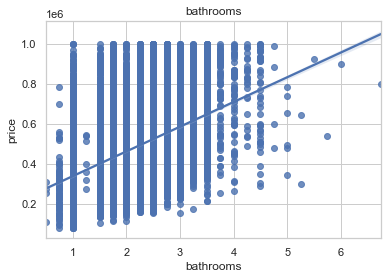

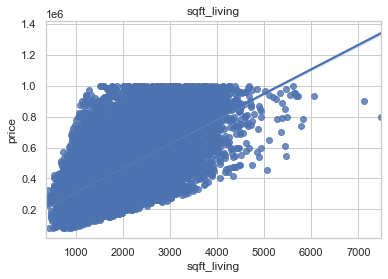

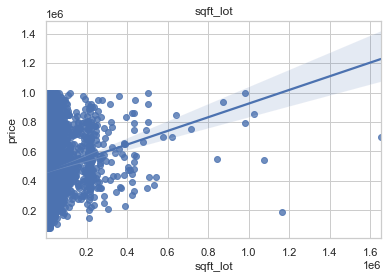

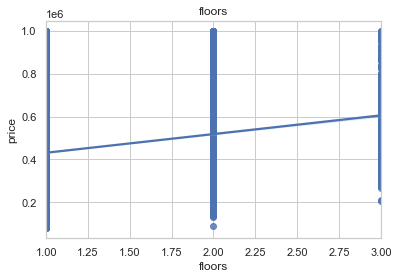

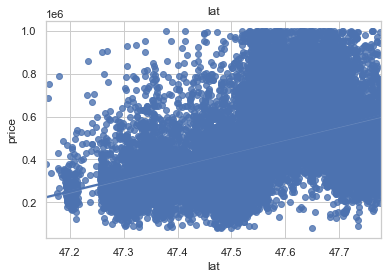

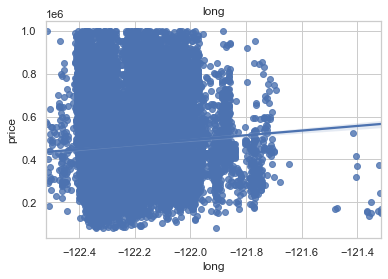

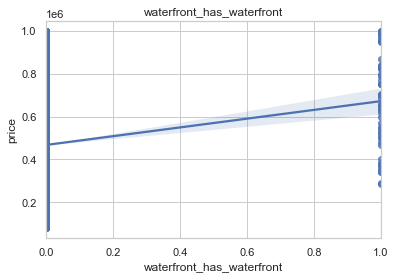

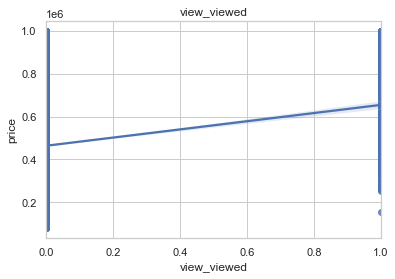

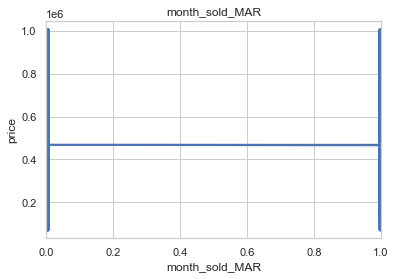

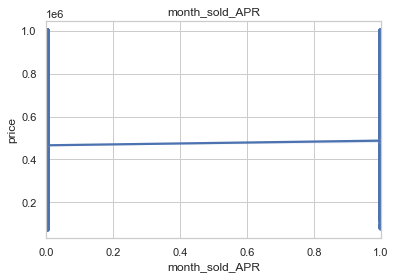

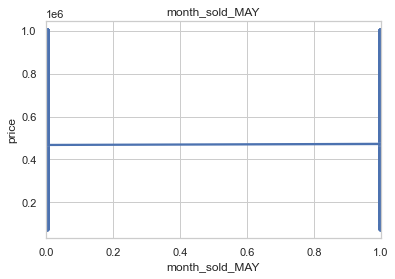

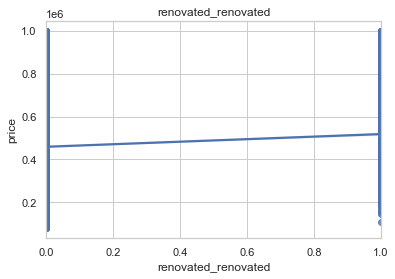

In [64]:
X = df.drop(columns=['price'], axis=1)
for col in X.columns:
    plt.subplots(1, 1)
    sns.regplot(X[col], df.price)
    plt.title(col)

From the regression plots above, we can confirm that linear relationships exist between our independent variables and the dependent variable

**Independence**

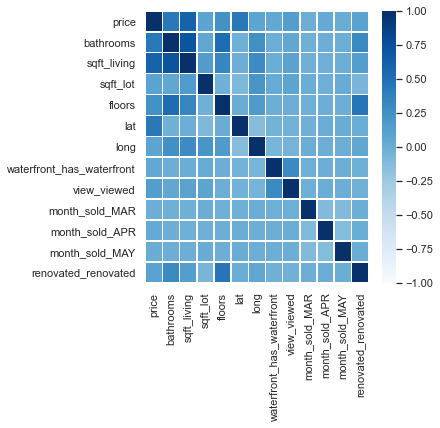

In [65]:
# making the correlation matrix
corr = df.corr() 

# Generate a mask 
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
plt.subplots(figsize=(5, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap="Blues", vmax=1, vmin=-1, center=0, linewidths=.5)

In [66]:
# Show all pairwise correlations above .75
abs(corr) > 0.75

,price,bathrooms,sqft_living,sqft_lot,floors,lat,long,waterfront_has_waterfront,view_viewed,month_sold_MAR,month_sold_APR,month_sold_MAY,renovated_renovated
price,True,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False,False,False,False,False
lat,False,False,False,False,False,True,False,False,False,False,False,False,False
long,False,False,False,False,False,False,True,False,False,False,False,False,False
waterfront_has_waterfront,False,False,False,False,False,False,False,True,False,False,False,False,False
view_viewed,False,False,False,False,False,False,False,False,True,False,False,False,False
month_sold_MAR,False,False,False,False,False,False,False,False,False,True,False,False,False


From the heatmap, we can confirm this "independence" assumption is met.

**Homoscedasticity**

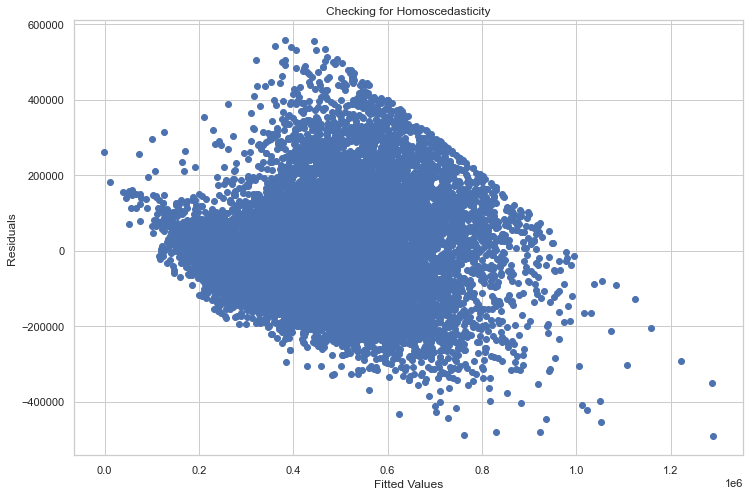

In [67]:
plt.figure(figsize=(12, 8))
plt.scatter(train_preds, smmodel.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Checking for Homoscedasticity')
plt.show()

In [68]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(smmodel.resid, smmodel.model.exog)
list(zip(name, test))

[('F statistic', 1.0173441924046855), ('p-value', 0.22044763308599935)]

You can use significance test like Goldfeld-Quandt above to detect homoscedasticity. Since this test gives us a p-value > 0.05, the null hypothesis cannot be rejected, and we can assume the data is homoscedastic.

**Normality**

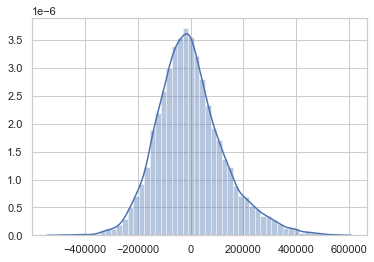

In [69]:
sns.distplot(smmodel.resid)

<Figure size 864x576 with 0 Axes>

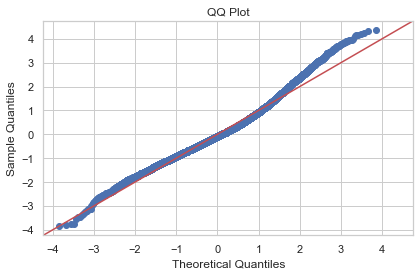

In [70]:
plt.figure(figsize=(12, 8))
sm.graphics.qqplot(smmodel.resid, dist=stats.norm, line='45', fit=True)
plt.title('QQ Plot')
plt.tight_layout()
plt.show()

We can use a Normal Q-Q plot and check to see the overall shape of our data against the required distribution to test the normality assumption. 
Our distribution is fairly normal and we can see how the quantiles of normal data appear as a straight line along the diagonal when plotted against a standard normal distribution's quantiles. Therefore, this assumption is satisfied

## 5. Interpretation

Multiple regression analysis was used to test if certain variables significantly predicted the sale price of homes in King County, Washington. The results of the regression indicated that 12 predictors can be explained 58% of the variance. All of the independent variables used in the model were significant predictors of sale price with p-values less than 0.05.

In [71]:
model_coefficients = pd.DataFrame(smmodel.params[1:], columns=['coefficients'])
model_coefficients

,coefficients
bathrooms,7446.164344
sqft_living,149.636261
sqft_lot,0.257304
floors,13171.533353
lat,613635.638795
long,-71222.620314
waterfront_has_waterfront,159191.836226
view_viewed,109836.644422
month_sold_MAR,18454.046765
month_sold_APR,29895.179919


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

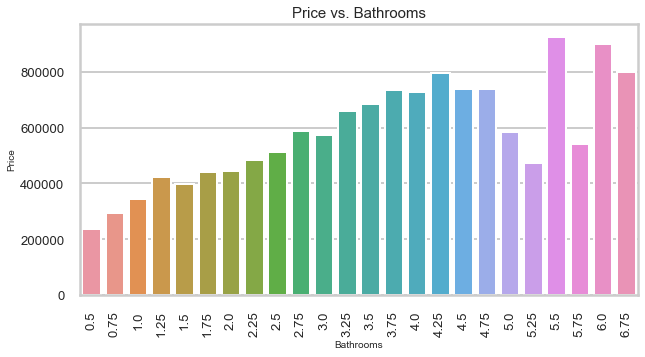

In [72]:
sns.set_context('poster', font_scale = 0.6)
plt.figure(figsize = (10,5))
sns.barplot(x = "bathrooms", y = "price", data = df, ci=False)
plt.title('Price vs. Bathrooms', fontsize = 15)
plt.xlabel('Bathrooms', fontsize = 10)
plt.ylabel('Price', fontsize = 10)
plt.xticks(rotation = 90)

One additional bathroom increases the sale price by 7446.16 dollars.

Text(0, 0.5, 'Price')

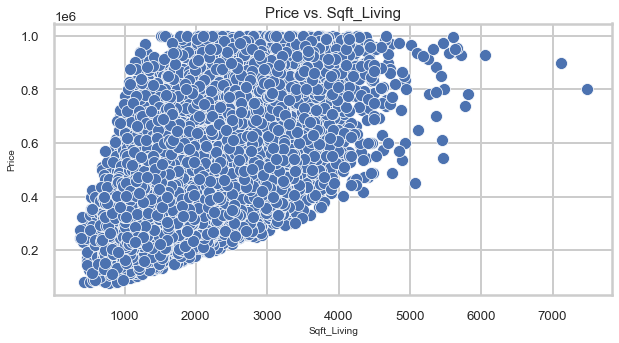

In [73]:
sns.set_context('poster', font_scale = 0.6)
plt.figure(figsize = (10,5))
sns.scatterplot(x = "sqft_living", y = "price", data = df)
plt.title('Price vs. Sqft_Living', fontsize = 15)
plt.xlabel('Sqft_Living', fontsize = 10)
plt.ylabel('Price', fontsize = 10)

One unit increase in square footage of internal living space increases the sale price by 149.64 dollars.

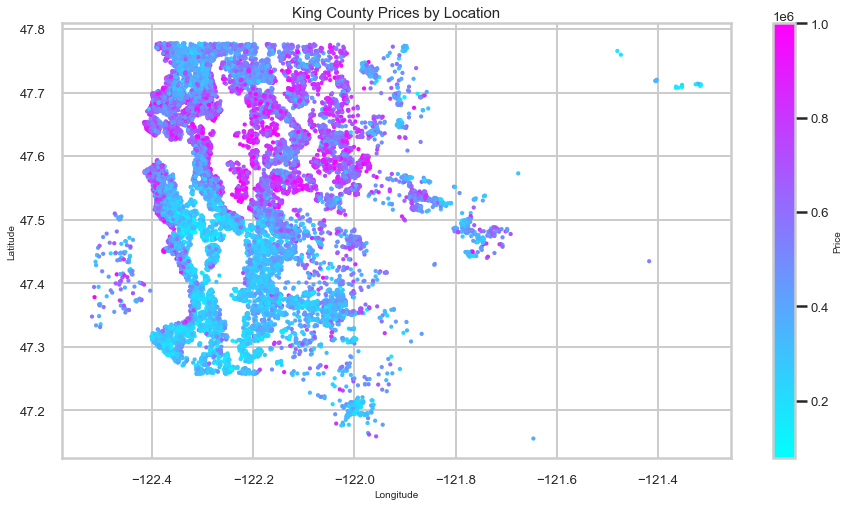

In [74]:
sns.set_context('poster', font_scale = 0.6)
plt.figure(figsize = (15,8))
plt.scatter(df.long, df.lat ,c=df.price, cmap = 'cool', s=5)
plt.colorbar().set_label('Price', fontsize = 10)
plt.xlabel('Longitude', fontsize = 10)
plt.ylabel('Latitude', fontsize = 10)
plt.title('King County Prices by Location', fontsize = 15)
plt.show()

Houses that have longitude and latitude coordinates closer to big cities (Seattle or Bellevue) have higher prices.

